### Seattle Airbnb Data Explore

Explore Seattle Airbnb data to answer following question:
1. Is there any price trend in calendar? When is the best time to visit Seattle?
2. What are neighbourhoods has more listings? Where can I find the good price room?
3. What're other features we can use to predict the price? And try models using these featues.

In [200]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
sns.set_theme()

#### Explore the data

In [201]:
df_review_raw = pd.read_csv('reviews.csv')
df_review_raw.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


This data only contain the comments. We may extract if the comments is negative or positive, and what customer mention in the comments. 
But currently I don't have any idea how to extract these information.

In [202]:
df_listing_raw = pd.read_csv('listings.csv')
df_listing_raw.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [203]:
# Explore columns of this list:
with pd.option_context('display.max_rows', None):
    print(df_listing_raw.columns)

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [204]:
# View the data of Price column:
print(df_listing_raw['price'].describe())
print('Number of null value: ',df_listing_raw['price'].isnull().sum())

count        3818
unique        273
top       $150.00
freq          162
Name: price, dtype: object
Number of null value:  0


In [205]:
#There is not any null value in columns price.
#But the price is in string format. We convert it to float
df_listing_raw['currency'] = df_listing_raw['price'].str[0]
df_listing_raw['price_float'] = df_listing_raw['price'].replace('[\$,]', '', regex=True).astype(float)
df_listing_raw[['price','currency','price_float']].describe(include='all')

<>:4: SyntaxWarning: invalid escape sequence '\$'
<>:4: SyntaxWarning: invalid escape sequence '\$'
C:\Users\admin\AppData\Local\Temp\ipykernel_10884\938499707.py:4: SyntaxWarning: invalid escape sequence '\$'
  df_listing_raw['price_float'] = df_listing_raw['price'].replace('[\$,]', '', regex=True).astype(float)


,price,currency,price_float
count,3818,3818,3818.000000
unique,273,1,NaN
top,$150.00,$,NaN
freq,162,3818,NaN
mean,NaN,NaN,127.976166
std,NaN,NaN,90.250022
min,NaN,NaN,20.000000
25%,NaN,NaN,75.000000
50%,NaN,NaN,100.000000
75%,NaN,NaN,150.000000


<Axes: xlabel='price_float', ylabel='Density'>

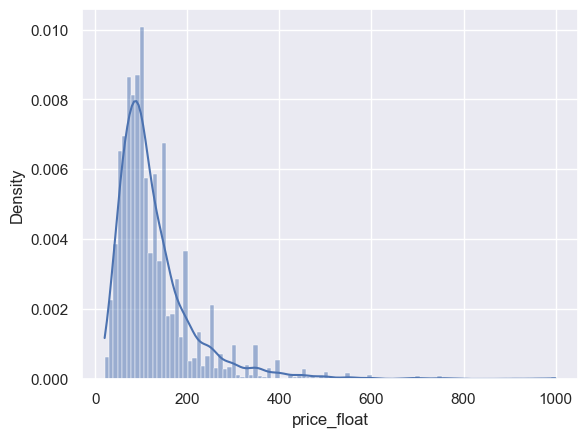

In [206]:
#View price distribution:
sns.histplot(data=df_listing_raw['price_float'], kde=True, stat='density')

##### Dealing with outliners
As the mean is 128 and 75% is 150 and max is 1000, we remove 1% outliners on the right tail

<Axes: xlabel='price_float', ylabel='Density'>

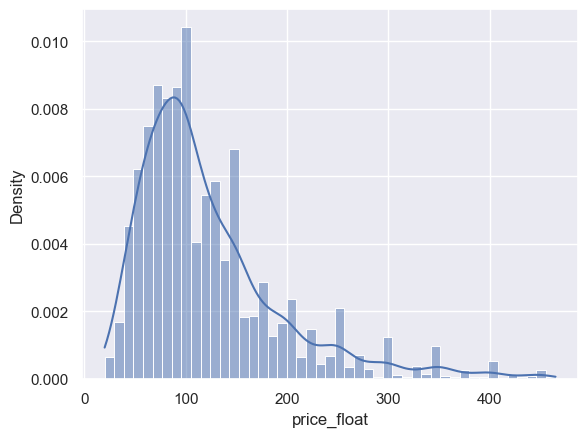

In [207]:
q = df_listing_raw['price_float'].quantile(0.99)
df_listing_cleaned = df_listing_raw[df_listing_raw['price_float']<q]
sns.histplot(data=df_listing_cleaned['price_float'], kde=True, stat='density')

In [208]:
df_calendar_raw = pd.read_csv('calendar.csv')
df_calendar_raw.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [209]:
#Convert price to float:
df_calendar_raw['currency'] = df_calendar_raw[df_calendar_raw['price'].isnull()==False]['price'].str[0]
df_calendar_raw['price_float'] = df_calendar_raw[df_calendar_raw['price'].isnull()==False]['price'].replace('[\$,]', '', regex=True).astype(float)
#Fill price_float null by 0
df_calendar_raw['price_float'] = df_calendar_raw['price_float'].fillna(0, axis=0)
df_calendar_raw.head()

<>:3: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
C:\Users\admin\AppData\Local\Temp\ipykernel_10884\2183063663.py:3: SyntaxWarning: invalid escape sequence '\$'
  df_calendar_raw['price_float'] = df_calendar_raw[df_calendar_raw['price'].isnull()==False]['price'].replace('[\$,]', '', regex=True).astype(float)


,listing_id,date,available,price,currency,price_float
0,241032,2016-01-04,t,$85.00,$,85.0
1,241032,2016-01-05,t,$85.00,$,85.0
2,241032,2016-01-06,f,NaN,NaN,0.0
3,241032,2016-01-07,f,NaN,NaN,0.0
4,241032,2016-01-08,f,NaN,NaN,0.0


#### Q1 Calendar price trend
I will use the calendar data to find if there is any price trend
To find out it, I will group the data by month, find how many avaiable date in each month, and anverage price in this month.

<Axes: xlabel='month', ylabel='count'>

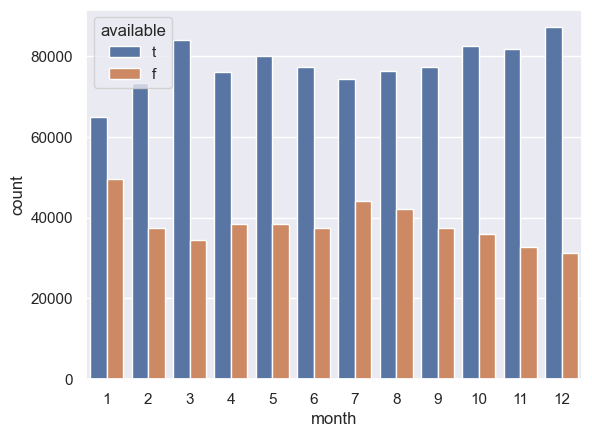

In [210]:
# Set month for each record:
df_calendar_raw['month']  = pd.DatetimeIndex(df_calendar_raw['date']).month
sns.countplot(df_calendar_raw, x='month',hue='available')


<Axes: xlabel='month', ylabel='price'>

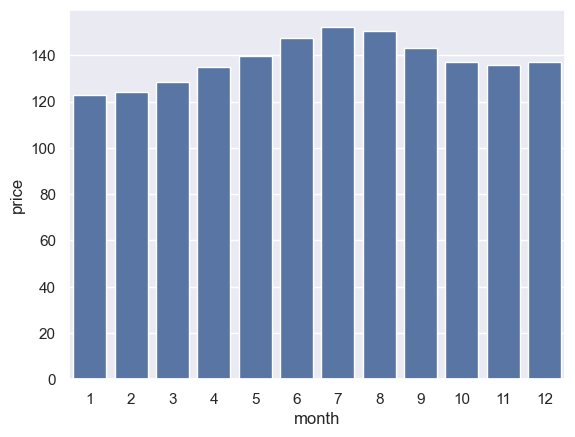

In [211]:
# Anverage price by month summary
df_price_month_summary = pd.DataFrame()
for m in range(1,13):
    df_calenda_id = df_calendar_raw[(df_calendar_raw['month']==m)&(df_calendar_raw['available']=='t')]
    anverage_price = df_calenda_id['price_float'].sum()/df_calenda_id.shape[0]
    df_price_month_summary = pd.concat([df_price_month_summary,pd.DataFrame({'month':[m], 'price':[anverage_price]})],ignore_index=True)

sns.barplot(df_price_month_summary,x='month',y='price')

##### Findings
Seem from May to September is the peak time. The price are higher and number of avaibale listings is lower in this period.
The price is lowest in January, event the avaiable listings in this month is lowest also. 

#### Q2 Price distribution by geography
Sometime I search for airbnb room, I see the different price by geography

<Axes: xlabel='longitude', ylabel='latitude'>

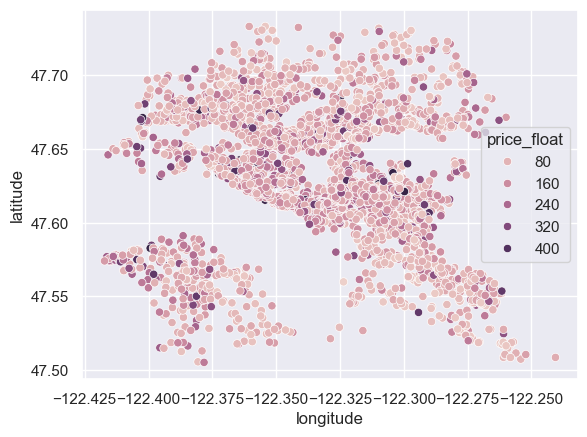

In [212]:
sns.scatterplot(data=df_listing_cleaned, x='longitude', y='latitude', hue='price_float')

Seem in the center and bottom left, the price is higher. But not to clear and I cannot use it to predict the price.
I will try with the neighbourhoods field

In [213]:
# Build a neighbourhoods summary data frame
df_neighbourhood_summary = pd.DataFrame()
for nbh in df_listing_cleaned['neighbourhood'].unique():
    df = df_listing_cleaned[df_listing_cleaned['neighbourhood']==nbh]
    nbh_count = df.shape[0]
    nbh_mean = df['price_float'].mean()
    nbh_std = df['price_float'].std()
    df_neighbourhood_summary = pd.concat([df_neighbourhood_summary,pd.DataFrame({'neighbourhood':[nbh],
                                                                                 'count':[nbh_count],
                                                                                 'mean_price':[nbh_mean],
                                                                                 'std':[nbh_std]})],ignore_index=True)
df_neighbourhood_summary = df_neighbourhood_summary.sort_values(by='count', ascending=False)
df_neighbourhood_summary['cum_percentage'] = df_neighbourhood_summary['count'].cumsum() / df_neighbourhood_summary['count'].sum() * 100

In [214]:
with pd.option_context('display.max_rows', None):
    print(df_neighbourhood_summary.reset_index(drop=True))

                neighbourhood  count  mean_price         std  cum_percentage
0                Capitol Hill    347  121.051873   62.815333       10.305910
1                     Ballard    212  121.957547   82.419532       16.602317
2                    Belltown    199  151.854271   65.037393       22.512623
3                       Minor    192  130.296875   78.098611       28.215028
4                  Queen Anne    181  151.580110   93.447908       33.590734
5                     Fremont    147  128.122449   79.858856       37.956638
6                 Wallingford    141  125.645390   80.372626       42.144342
7         University District    107   95.420561   57.937676       45.322245
8                  First Hill    104  132.586538   48.838869       48.411048
9                     Stevens     98  123.989796   84.489918       51.321651
10          North Beacon Hill     95   92.652632   54.218975       54.143154
11           Lower Queen Anne     82  138.243902   57.248119       56.578557

<Axes: xlabel='longitude', ylabel='latitude'>

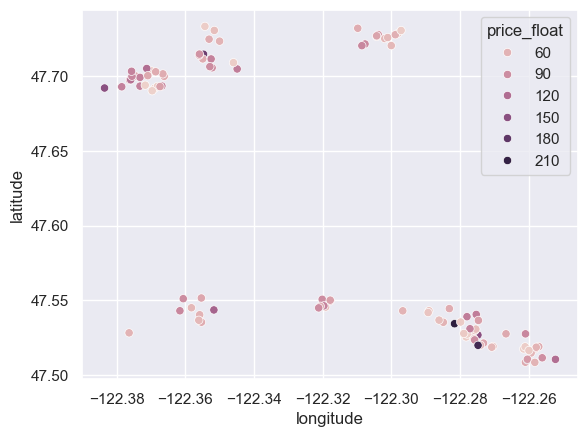

In [215]:
sns.scatterplot(data=df_listing_cleaned[df_listing_cleaned['neighbourhood'].isin(df_neighbourhood_summary[df_neighbourhood_summary['mean_price']<80]['neighbourhood'])], 
                x='longitude', y='latitude', hue='price_float')

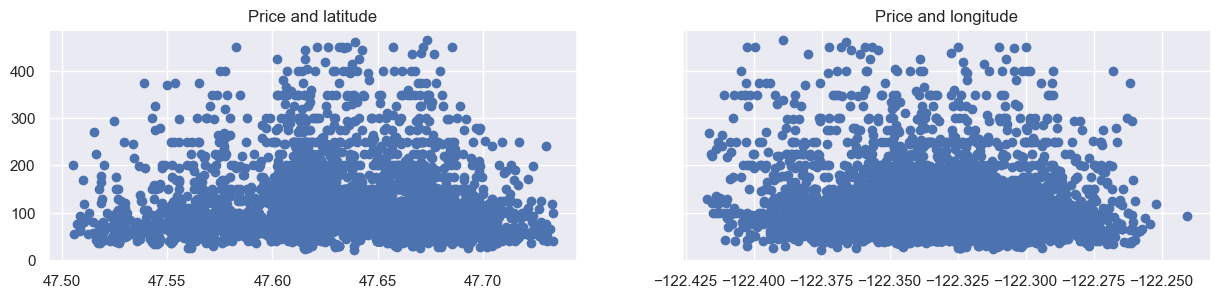

In [216]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize =(15,3))
ax1.scatter(df_listing_cleaned['latitude'],df_listing_cleaned['price_float'])
ax1.set_title('Price and latitude')
ax2.scatter(df_listing_cleaned['longitude'],df_listing_cleaned['price_float'])
ax2.set_title('Price and longitude')
plt.show()

##### Findings
Top 10 neighbourhoods has more than 50% of listings. <br>
And 48 neighbourhoods at the bottom of the list only have 14% of listings.<br>
Some neighbourhoods has lower price like Olympic Hills, Dunlap, Rainier Beach<br>
But the locations have lower price are far from the center.<br>
Cannot see relation between location with the price :(

#### Q3. What're other features we can use to predict the price? And try models using these featues.

Seem the price will be linear relationship with the distance from the center.<br>
But after check the location of Magnolia and Queen Anne, it's not correct. <br>
Queen Anne near the center than Magnolia but the anverage price in Magnolia is higher.

In [217]:
#sns.scatterplot(data=df_listing_cleaned, 
#                x='guests_included', y='price_float')

df_listing_cleaned.loc[:,'cleaning_fee_float'] = df_listing_cleaned[df_listing_cleaned['cleaning_fee'].isnull()==False]['cleaning_fee'].replace('[\$,]', '', regex=True).astype(float)
#Fill cleaning_fee_float null by 0
df_listing_cleaned.loc[:,'cleaning_fee_float'] = df_listing_cleaned['cleaning_fee_float'].fillna(0, axis=0)

<>:4: SyntaxWarning: invalid escape sequence '\$'
<>:4: SyntaxWarning: invalid escape sequence '\$'
C:\Users\admin\AppData\Local\Temp\ipykernel_10884\1686404782.py:4: SyntaxWarning: invalid escape sequence '\$'
  df_listing_cleaned.loc[:,'cleaning_fee_float'] = df_listing_cleaned[df_listing_cleaned['cleaning_fee'].isnull()==False]['cleaning_fee'].replace('[\$,]', '', regex=True).astype(float)
C:\Users\admin\AppData\Local\Temp\ipykernel_10884\1686404782.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_listing_cleaned.loc[:,'cleaning_fee_float'] = df_listing_cleaned[df_listing_cleaned['cleaning_fee'].isnull()==False]['cleaning_fee'].replace('[\$,]', '', regex=True).astype(float)


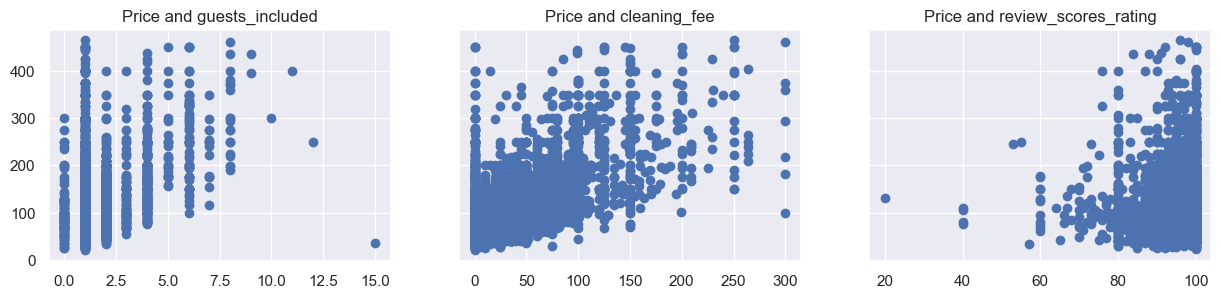

In [218]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(df_listing_cleaned['guests_included'],df_listing_cleaned['price_float'])
ax1.set_title('Price and guests_included')
ax2.scatter(df_listing_cleaned['cleaning_fee_float'],df_listing_cleaned['price_float'])
ax2.set_title('Price and cleaning_fee')
ax3.scatter(df_listing_cleaned['review_scores_rating'],df_listing_cleaned['price_float'])
ax3.set_title('Price and review_scores_rating')
plt.show()

<Axes: xlabel='count', ylabel='property_type'>

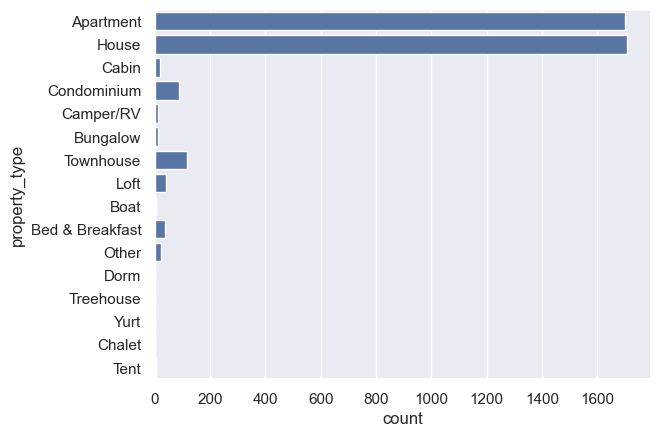

In [219]:
sns.countplot(data= df_listing_cleaned, y='property_type')

<Axes: xlabel='count', ylabel='room_type'>

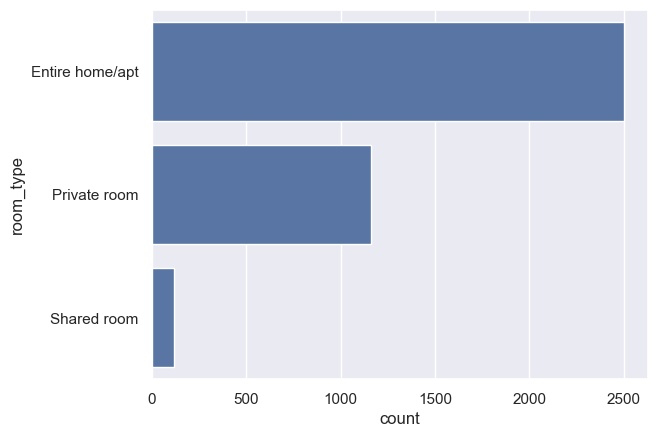

In [220]:
sns.countplot(data= df_listing_cleaned, y='room_type')

<Axes: xlabel='count', ylabel='bed_type'>

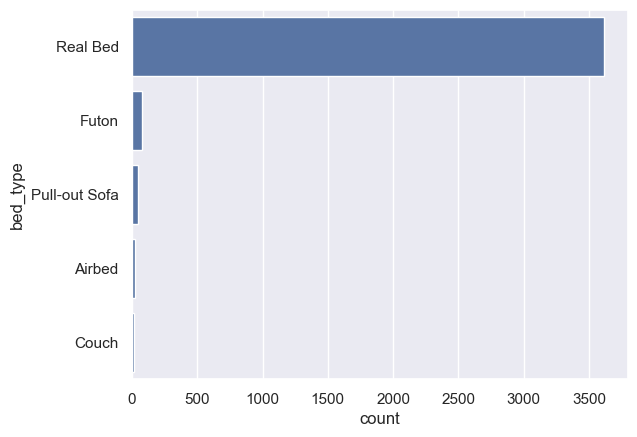

In [221]:
sns.countplot(data= df_listing_cleaned, y='bed_type')

guests_included and cleaning_fee can be used for linear regression

In [222]:
# Parse amenities into array
def parse_amenities(amenities):
    items = amenities.strip('{}').split(',')
    items = [item.strip().strip('"') for item in items]
    return set(items)

In [223]:
df_listing_cleaned.loc[:,'amenities_set'] = df_listing_cleaned['amenities'].apply(lambda x: parse_amenities(x))
amenities_list = ['Air Conditioning','Heating','TV','Cable TV','Internet','Wireless Internet',
                  'Free Parking on Premises','Family/Kid Friendly','Washer','Dryer','Pets Allowed',
                  'Kitchen','Breakfast','Pets live on this property','Gym']
for amenity in amenities_list:
    df_listing_cleaned.loc[:,amenity] = df_listing_cleaned['amenities_set'].apply(lambda x: amenity in x)
df_listing_cleaned[amenities_list].describe()


C:\Users\admin\AppData\Local\Temp\ipykernel_10884\4212341764.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_listing_cleaned.loc[:,'amenities_set'] = df_listing_cleaned['amenities'].apply(lambda x: parse_amenities(x))
C:\Users\admin\AppData\Local\Temp\ipykernel_10884\4212341764.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_listing_cleaned.loc[:,amenity] = df_listing_cleaned['amenities_set'].apply(lambda x: amenity in x)
C:\Users\admin\AppData\Local\Temp\ipykernel_10884\4212341764.py:6: Setti

,Air Conditioning,Heating,TV,Cable TV,Internet,Wireless Internet,Free Parking on Premises,Family/Kid Friendly,Washer,Dryer,Pets Allowed,Kitchen,Breakfast,Pets live on this property,Gym
count,3778,3778,3778,3778,3778,3778,3778,3778,3778,3778,3778,3778,3778,3778,3778
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,False,True,True,False,True,True,True,True,True,True,False,True,False,False,False
freq,3116,3589,2541,2357,2779,3629,2138,1929,2956,2960,3316,3385,3488,2904,3343


Many columes has freq very high. 95.8% of Airbnb house has Wireless Internet. So I don't think they will contribute to the price<br>
I will try the model with with 'Free Parking on Premises', 'Family/Kid Friendly' first.<br>
In the first model, I will try the following features: <br>
1. neighbourhood: 'Capitol Hill', 'Ballard', 'Belltown', 'Minor', 'Queen Anne',  'Fremont', 'Wallingford',  'University District', 'First Hill', 'Stevens', 'North Beacon Hill'  
2. cleaning_fee
3. guests_included
4. property_type: 'Apartment', 'House', 'Condominium', 'Townhouse'
5. room_type
6. amenities: 'Free Parking on Premises', 'Family/Kid Friendly'


In [224]:
# create data frame with selected colums
data_preprocessed = df_listing_cleaned[['price_float',
                                        'neighbourhood',
                                        'cleaning_fee_float',
                                        'guests_included',
                                        'property_type',
                                        'room_type',
                                        'Free Parking on Premises',
                                        'Family/Kid Friendly']].copy()
# remove some neighbourhood to narrow down number of feature
selected_neighbourhood = {'Capitol Hill','Ballard','Belltown','Minor', 
                          'Queen Anne','Fremont','Wallingford','University District', 
                          'First Hill', 'Stevens', 'North Beacon Hill'}
data_preprocessed = data_preprocessed.loc[data_preprocessed['neighbourhood'].isin(selected_neighbourhood)]
# remove some property_type to narrow down number of feature
selected_property_type = {'Apartment','House','Condominium','Townhouse'}
data_preprocessed = data_preprocessed.loc[data_preprocessed['property_type'].isin(selected_property_type)]
# remove guests_included outliners
data_preprocessed = data_preprocessed.loc[data_preprocessed['guests_included']<15]
# create dummy columns
data_preprocessed = pd.get_dummies(data_preprocessed, drop_first=True)

In [225]:
y = data_preprocessed['price_float']
X = data_preprocessed.drop('price_float', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state=42)
lm_model = LinearRegression()
lm_model.fit(X_train, y_train)

y_test_preds = lm_model.predict(X_test)
r2_score_test = r2_score(y_test, y_test_preds)
mse_test = mean_squared_error(y_test, y_test_preds)
r2_score_train = r2_score(y_train, lm_model.predict(X_train))
mse_train = mean_squared_error(y_train, lm_model.predict(X_train))


In [226]:
print([r2_score_test,mse_test,r2_score_train,mse_train,lm_model.intercept_])

[0.5637628329449064, 2127.3641165455247, 0.4836231681029518, 3032.7677275266064, 72.1727916669087]


In [227]:
preds_vs_act = pd.DataFrame(np.hstack([y_test.values.reshape(y_test.size,1), y_test_preds.reshape(y_test.size,1)]))
preds_vs_act.columns = ['actual', 'preds']
preds_vs_act['diff'] = preds_vs_act['actual'] - preds_vs_act['preds']
preds_vs_act.shape

(351, 3)

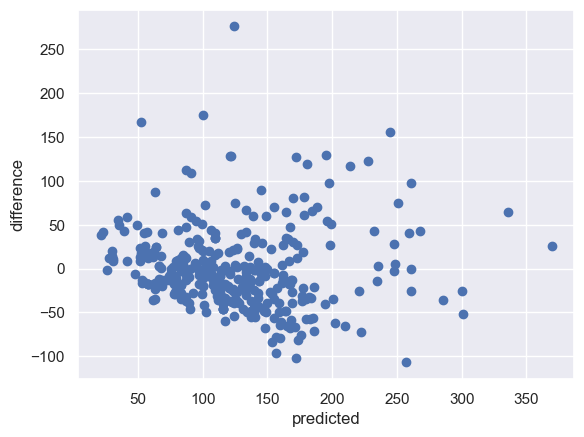

In [228]:
plt.plot(preds_vs_act['preds'], preds_vs_act['diff'], 'bo');
plt.xlabel('predicted');
plt.ylabel('difference');

In [229]:
from sklearn.feature_selection import f_regression

reg_summary = pd.DataFrame(X.columns.values, columns=['Features'])
reg_summary['Weights'] = lm_model.coef_
reg_summary['p-value'] = f_regression(X_train,y_train)[1].round(3)
reg_summary

,Features,Weights,p-value
0,cleaning_fee_float,0.604426,0.000
1,guests_included,9.390301,0.000
2,Free Parking on Premises,7.216778,0.000
3,Family/Kid Friendly,5.122172,0.000
4,neighbourhood_Belltown,15.498195,0.000
5,neighbourhood_Capitol Hill,18.716975,0.107
6,neighbourhood_First Hill,17.612062,0.365
7,neighbourhood_Fremont,0.845765,0.266
8,neighbourhood_Minor,0.020481,0.763
9,neighbourhood_North Beacon Hill,-17.081599,0.000


In [230]:
# The P-value of neighbourhood and property_type are high, 
# try to remove these feature to see if the model is improved
# create data frame with selected colums
data_preprocessed = df_listing_cleaned[['price_float',
                                        'cleaning_fee_float',
                                        'guests_included',
                                        'room_type',
                                        'Free Parking on Premises',
                                        'Family/Kid Friendly']].copy()
# remove guests_included outliners
data_preprocessed = data_preprocessed.loc[data_preprocessed['guests_included']<15]
# create dummy columns
data_preprocessed = pd.get_dummies(data_preprocessed, drop_first=True)


In [231]:
y = data_preprocessed['price_float']
X = data_preprocessed.drop('price_float', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=43)
lm_model = LinearRegression()
lm_model.fit(X_train, y_train)

y_test_preds = lm_model.predict(X_test)
r2_score_test = r2_score(y_test, y_test_preds)
mse_test = mean_squared_error(y_test, y_test_preds)
r2_score_train = r2_score(y_train, lm_model.predict(X_train))
mse_train = mean_squared_error(y_train, lm_model.predict(X_train))
print([r2_score_test,mse_test,r2_score_train,mse_train,lm_model.intercept_])

[0.44621843986970966, 3147.2193544133884, 0.4426948112211724, 2875.041762264163, 90.11053080896346]


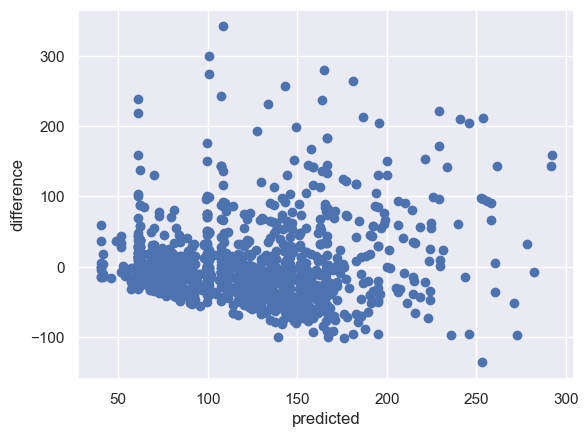

In [232]:
preds_vs_act = pd.DataFrame(np.hstack([y_test.values.reshape(y_test.size,1), y_test_preds.reshape(y_test.size,1)]))
preds_vs_act.columns = ['actual', 'preds']
preds_vs_act['diff'] = preds_vs_act['actual'] - preds_vs_act['preds']
plt.plot(preds_vs_act['preds'], preds_vs_act['diff'], 'bo');
plt.xlabel('predicted');
plt.ylabel('difference');

In [233]:
reg_summary = pd.DataFrame(X.columns.values, columns=['Features'])
reg_summary['Weights'] = lm_model.coef_
reg_summary['p-value'] = f_regression(X_train,y_train)[1].round(3)
reg_summary

,Features,Weights,p-value
0,cleaning_fee_float,0.580192,0.0
1,guests_included,9.620975,0.0
2,Free Parking on Premises,1.076183,0.0
3,Family/Kid Friendly,7.581314,0.0
4,room_type_Private room,-38.610549,0.0
5,room_type_Shared room,-59.481011,0.0


##### Try to apply transformation
to make the price normal distribution

<Axes: xlabel='price_float', ylabel='Density'>

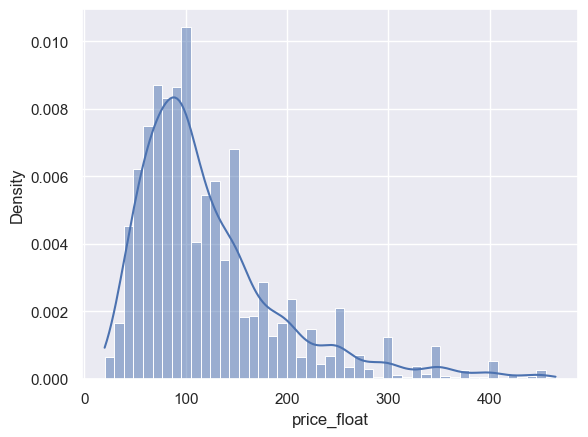

In [234]:
# Original distribution
sns.histplot(data=y, kde=True, stat='density')

<Axes: xlabel='price_float', ylabel='Density'>

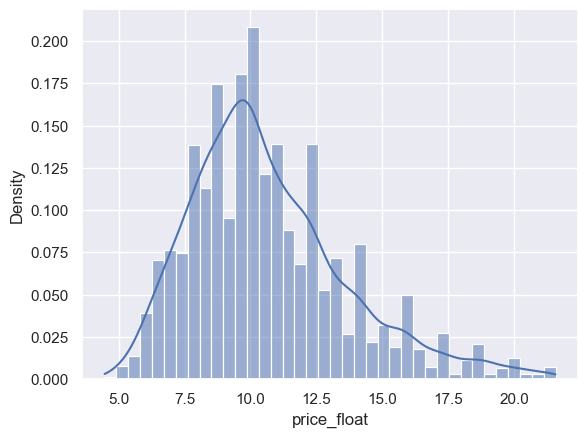

In [235]:
# square root transformation
y_square_root = np.sqrt(y)
sns.histplot(data=y_square_root, kde=True, stat='density')

<Axes: xlabel='price_float', ylabel='Density'>

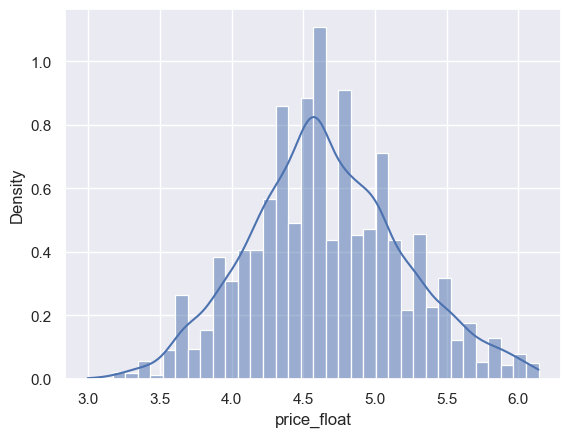

In [236]:
# log transformation
y_log = np.log(y)
sns.histplot(data=y_log, kde=True, stat='density')

<Axes: ylabel='Density'>

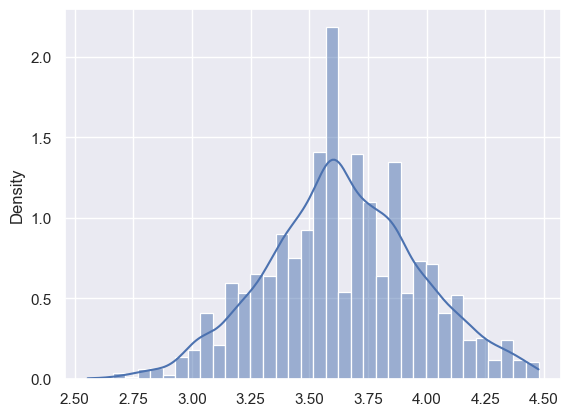

In [237]:
# Box-Cox Transformation
from scipy.stats import boxcox
y_boxcox, _ = boxcox(y)
sns.histplot(data=y_boxcox, kde=True, stat='density')

Log transformation look bettwe, try to use it

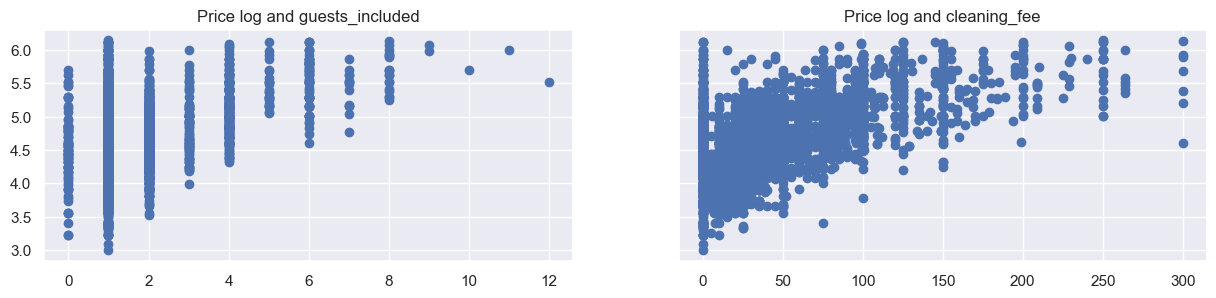

In [238]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize =(15,3))
ax1.scatter(X['guests_included'],y_log)
ax1.set_title('Price log and guests_included')
ax2.scatter(X['cleaning_fee_float'],y_log)
ax2.set_title('Price log and cleaning_fee')
plt.show()

In [239]:
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size = .30, random_state=123)
lm_model = LinearRegression()
lm_model.fit(X_train, y_train)

y_test_preds = lm_model.predict(X_test)
r2_score_test = r2_score(y_test, y_test_preds)
mse_test = mean_squared_error(y_test, y_test_preds)
r2_score_train = r2_score(y_train, lm_model.predict(X_train))
mse_train = mean_squared_error(y_train, lm_model.predict(X_train))
print([r2_score_test,mse_test,r2_score_train,mse_train,lm_model.intercept_])

[0.5288483168962315, 0.13088690780032378, 0.5268881897377355, 0.13974776927050991, 4.552297766380774]


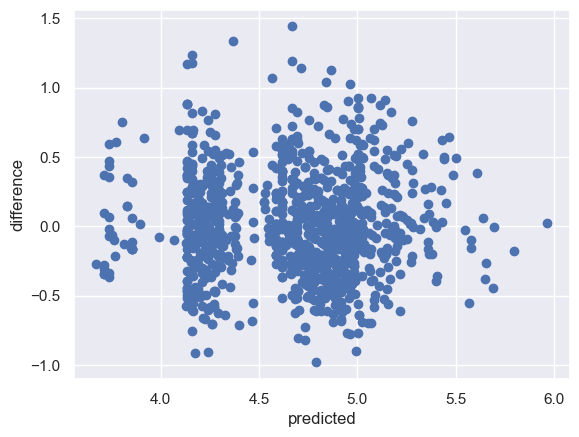

In [240]:
preds_vs_act = pd.DataFrame(np.hstack([y_test.values.reshape(y_test.size,1), y_test_preds.reshape(y_test.size,1)]))
preds_vs_act.columns = ['actual', 'preds']
preds_vs_act['diff'] = preds_vs_act['actual'] - preds_vs_act['preds']
plt.plot(preds_vs_act['preds'], preds_vs_act['diff'], 'bo');
plt.xlabel('predicted');
plt.ylabel('difference');

In [241]:
reg_summary = pd.DataFrame(X.columns.values, columns=['Features'])
reg_summary['Weights'] = lm_model.coef_
reg_summary['p-value'] = f_regression(X_train,y_train)[1].round(3)
reg_summary

,Features,Weights,p-value
0,cleaning_fee_float,0.003338,0.000
1,guests_included,0.062980,0.000
2,Free Parking on Premises,-0.026558,0.003
3,Family/Kid Friendly,0.079284,0.000
4,room_type_Private room,-0.456643,0.000
5,room_type_Shared room,-0.878354,0.000


##### Findings
The last model can explain 53% price of the Airbnb house.<br>
Actually the price should base on the location of the house. <br>
But I could not find the way to modeling it.<br>